Results for Action Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:          17374450683889.914
Model:                            OLS   Adj. R-squared:     17419423377635.961
Method:                 Least Squares   F-statistic:                    -386.3
Date:                Mon, 21 Nov 2016   Prob (F-statistic):               1.00
Time:                        12:59:07   Log-Likelihood:                -38338.
No. Observations:                1162   AIC:                         7.668e+04
Df Residuals:                    1159   BIC:                         7.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    6.044e+10    2

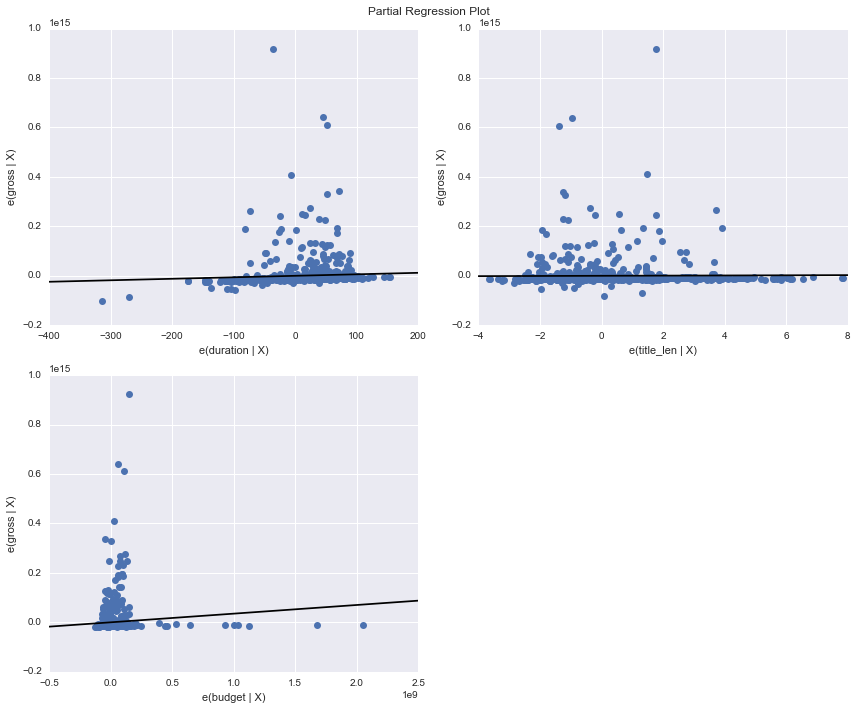

In [4]:
import pandas as pd 
import numpy as np  
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

movie_df = pd.read_csv('movie_master_dataset.csv', encoding = "ISO-8859-1")

top_genres = ['Action', 'Drama', 'Thriller', 'Comedy', 'Romance']

def get_movies(movie_df): 
    movies = [] 
    keep = ['movie_title', 'gross', 'duration', 'budget']
    action = movie_df[movie_df['genres'].str.contains('Action')]
    action = action[keep]
    movies.append(action)

    drama = movie_df[movie_df['genres'].str.contains('Drama')]
    drama = drama[keep]
    movies.append(drama)

    thriller = movie_df[movie_df['genres'].str.contains('Thriller')]
    thriller = thriller[keep]
    movies.append(thriller)
    
    comedy = movie_df[movie_df['genres'].str.contains('Comedy')]
    comedy = comedy[keep]
    movies.append(comedy)
    
    romance = movie_df[movie_df['genres'].str.contains('Romance')]
    romance = romance[keep]
    movies.append(romance)
    
    return movies

movies = get_movies(movie_df) 

for i in range(len(movies)): 
    movies[i] = movies[i].reset_index(drop=True)
    title_len= [] 
    for j in range(len(movies[i])): 
        title_len.append(len(movies[i]['movie_title'][j].split())) 
    movies[i]['title_len'] = title_len 
    
    movies[i]['duration'] = movies[i]['duration'].apply(lambda x: str(x))
    movies[i]['duration'] = movies[i]['duration'].apply(lambda x: int(x[:3]) if x[0] == '1' else int(x[:2])) 

def ols(data): 
#     INTERCEPT? 
#     model = smf.ols(formula='gross ~ duration + budget + title_len', data=data).fit()
#     model.summary()
#     print(model.summary())
#     fig = plt.figure(figsize=(12,8))
#     fig = sm.graphics.plot_partregress_grid(model, fig=fig)

    results = sm.OLS(movies[0]['gross'], movies[0][['duration', 'title_len', 'budget']]).fit()
    print(results.summary())
    fig = plt.figure(figsize=(12,10))
    fig = sm.graphics.plot_partregress_grid(results, fig=fig)
    plt.show()
    
print('Results for ' + top_genres[0] + ' Movies')
ols(movies[0])

Results for Drama Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:          17374450683889.914
Model:                            OLS   Adj. R-squared:     17419423377635.961
Method:                 Least Squares   F-statistic:                    -386.3
Date:                Mon, 21 Nov 2016   Prob (F-statistic):               1.00
Time:                        12:59:11   Log-Likelihood:                -38338.
No. Observations:                1162   AIC:                         7.668e+04
Df Residuals:                    1159   BIC:                         7.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    6.044e+10    2.

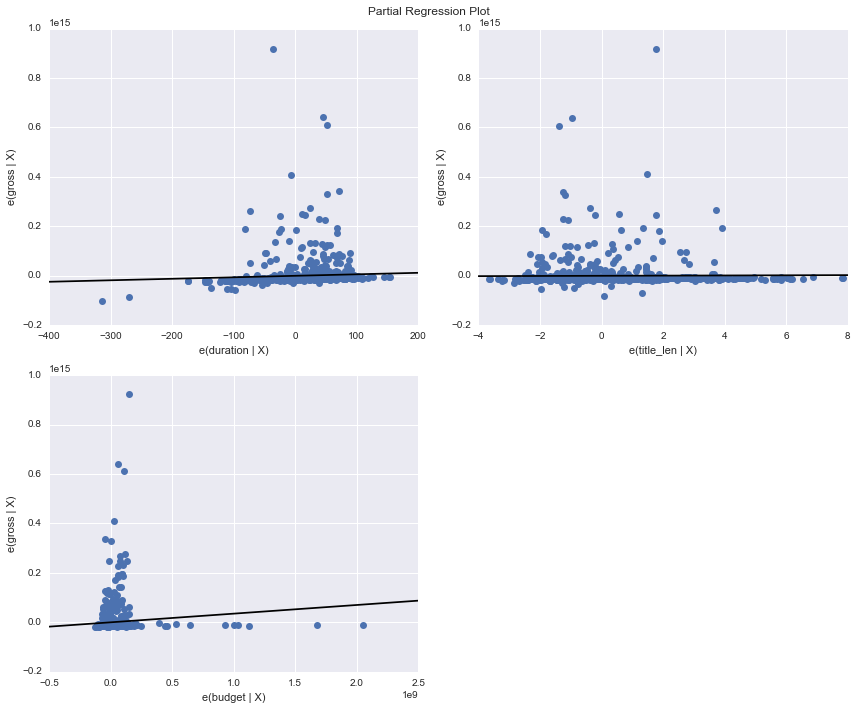

In [5]:
print('Results for ' + top_genres[1] + ' Movies')
ols(movies[1])

Results for Thriller Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:          17374450683889.914
Model:                            OLS   Adj. R-squared:     17419423377635.961
Method:                 Least Squares   F-statistic:                    -386.3
Date:                Mon, 21 Nov 2016   Prob (F-statistic):               1.00
Time:                        12:59:16   Log-Likelihood:                -38338.
No. Observations:                1162   AIC:                         7.668e+04
Df Residuals:                    1159   BIC:                         7.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    6.044e+10   

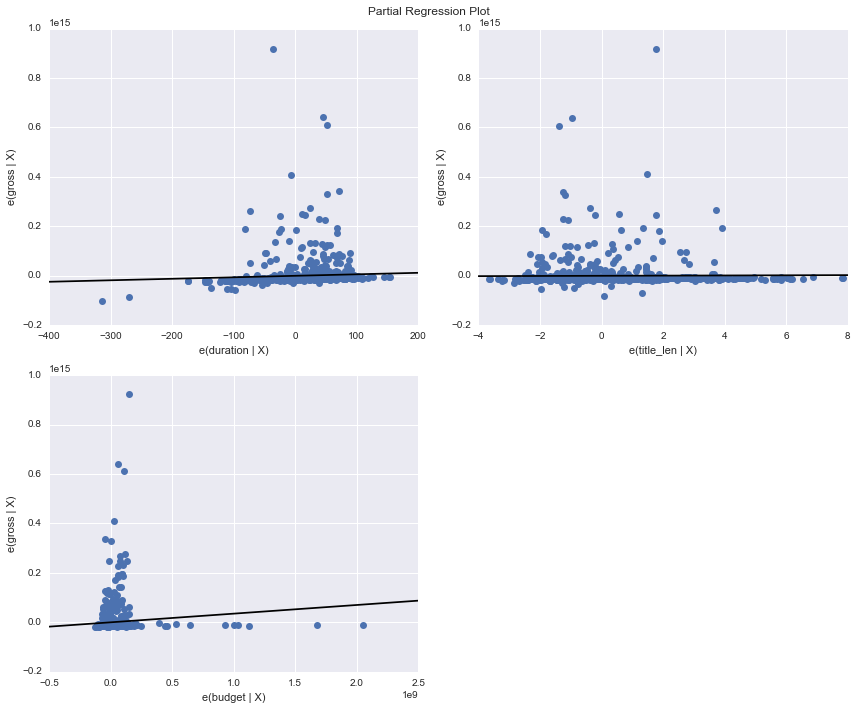

In [6]:
print('Results for ' + top_genres[2] + ' Movies')
ols(movies[2])

Results for Comedy Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:          17374450683889.914
Model:                            OLS   Adj. R-squared:     17419423377635.961
Method:                 Least Squares   F-statistic:                    -386.3
Date:                Mon, 21 Nov 2016   Prob (F-statistic):               1.00
Time:                        12:59:23   Log-Likelihood:                -38338.
No. Observations:                1162   AIC:                         7.668e+04
Df Residuals:                    1159   BIC:                         7.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    6.044e+10    2

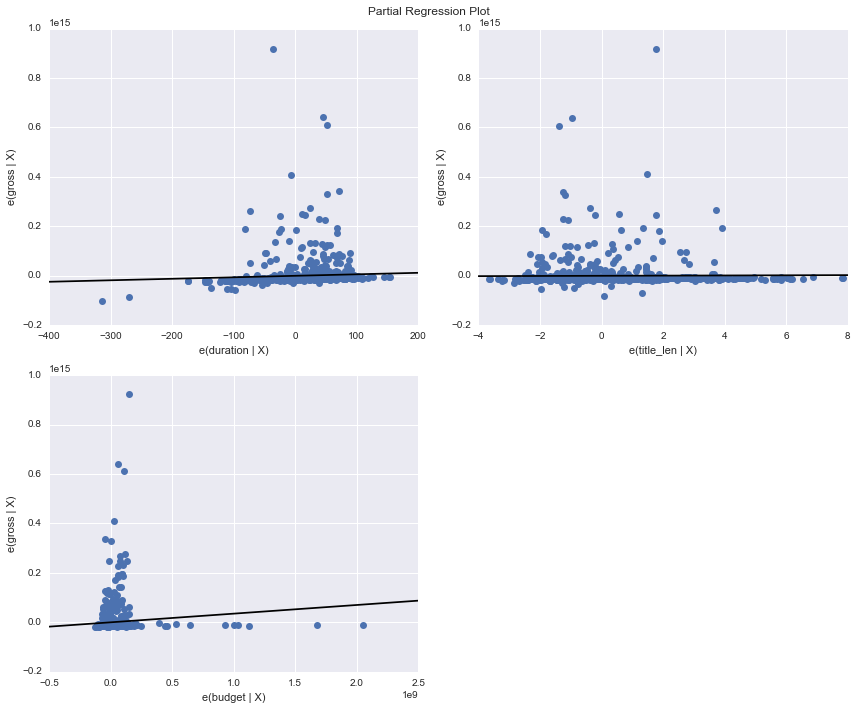

In [7]:
print('Results for ' + top_genres[3] + ' Movies')
ols(movies[3])

Results for Romance Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:          17374450683889.914
Model:                            OLS   Adj. R-squared:     17419423377635.961
Method:                 Least Squares   F-statistic:                    -386.3
Date:                Mon, 21 Nov 2016   Prob (F-statistic):               1.00
Time:                        12:59:26   Log-Likelihood:                -38338.
No. Observations:                1162   AIC:                         7.668e+04
Df Residuals:                    1159   BIC:                         7.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    6.044e+10    

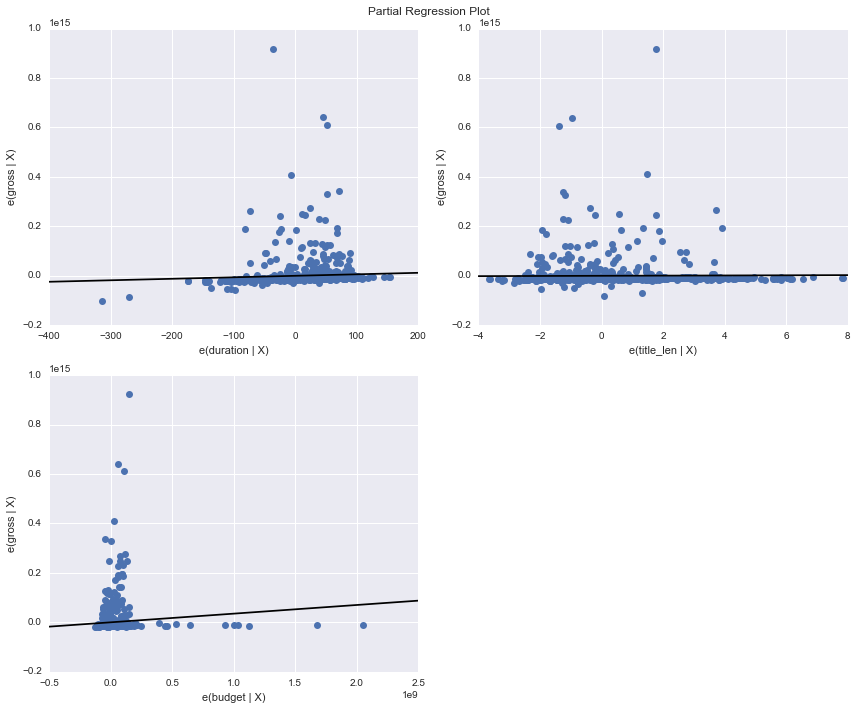

In [8]:
print('Results for ' + top_genres[4] + ' Movies')
ols(movies[4])